# Data Augmentation

In this lab, you will develop a data augmentation.

In [1]:
import tensorflow as tf
import numpy as np
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
# portions of this lab were taken from Deep Learning with Python

import glob
import os
import random
import shutil

from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import *

import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
NSAMPLES = 1000

dataset_dir = "dogs-vs-cats-small/dogs-vs-cats-small"

train_dir = dataset_dir + "/train"

train_dogs = glob.glob(train_dir + "/dog*.*")
train_cats = glob.glob(train_dir + "/cat*.*")

sampled_train_dir = dataset_dir + "/s_train"
sampled_valid_dir = dataset_dir + "/s_valid"
sampled_test_dir = dataset_dir + "/s_test"

try:
    shutil.rmtree(sampled_train_dir)
    shutil.rmtree(sampled_valid_dir)
    shutil.rmtree(sampled_test_dir)
except:
    pass

os.mkdir(sampled_train_dir)
os.mkdir(sampled_valid_dir)
os.mkdir(sampled_test_dir)

os.mkdir(sampled_train_dir + "/dogs")
os.mkdir(sampled_train_dir + "/cats")

os.mkdir(sampled_valid_dir + "/dogs")
os.mkdir(sampled_valid_dir + "/cats")

os.mkdir(sampled_test_dir + "/dogs")
os.mkdir(sampled_test_dir + "/cats")

random.shuffle(train_dogs)
random.shuffle(train_cats)

for fn in train_dogs[0:NSAMPLES]:
    src = fn
    dst = sampled_train_dir + "/dogs/" + os.path.split(src)[-1]
    shutil.copyfile(src, dst)

for fn in train_cats[0:NSAMPLES]:
    src = fn
    dst = sampled_train_dir + "/cats/" + os.path.split(src)[-1]
    shutil.copyfile(src, dst)

for fn in train_dogs[NSAMPLES:NSAMPLES + NSAMPLES//2]:
    src = fn
    dst = sampled_valid_dir + "/dogs/" + os.path.split(src)[-1]
    shutil.copyfile(src, dst)

for fn in train_cats[NSAMPLES:NSAMPLES + NSAMPLES//2]:
    src = fn
    dst = sampled_valid_dir + "/cats/" + os.path.split(src)[-1]
    shutil.copyfile(src, dst)

print("... generated directories s_train, s_valid and s_test")

... generated directories s_train, s_valid and s_test


Now you will create a model to learn now to differentiate between cats and dogs.

In [4]:
def get_model():
    x = x_in = Input((150,150,3), name="input")
    x = Conv2D(32, (5,5), padding="valid",  name="fe0")(x)
    x = Activation("gelu", name="r0")(x)
    x = MaxPooling2D(2,2,name="mp0")(x)
    x = Conv2D(64, (3,3), padding="valid", name="fe1")(x)
    x = Activation("gelu", name="r1")(x)
    x = MaxPooling2D(2,2,name="mp1")(x)
    x = Conv2D(128, (3,3), padding="valid", name="fe2")(x)
    x = Activation("gelu", name="r2")(x)
    x = MaxPooling2D(2,2,name="mp2")(x)
    x = Conv2D(128, (3,3), padding="valid", name="fe3")(x)
    x = Activation("gelu", name="r3")(x)
    x = MaxPooling2D(2,2,name="mp3")(x)
    x = Flatten(name="fl")(x)
    x = Dropout(0.5, name="d5")(x)
    x = Dense(512, name="d1", activation="swish")(x)
    x = Dense(1, name="d2")(x)
    x = Activation("sigmoid", name="s1")(x)
    m = Model(inputs=x_in, outputs=x, name='mymodel')
    m.summary()
    
    return m

adam = tf.keras.optimizers.Adam(learning_rate=0.001) # Adam(learning_rate=0.001)

model = get_model()
model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["acc"])

Model: "mymodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 150, 150, 3)]     0         
_________________________________________________________________
fe0 (Conv2D)                 (None, 146, 146, 32)      2432      
_________________________________________________________________
r0 (Activation)              (None, 146, 146, 32)      0         
_________________________________________________________________
mp0 (MaxPooling2D)           (None, 73, 73, 32)        0         
_________________________________________________________________
fe1 (Conv2D)                 (None, 71, 71, 64)        18496     
_________________________________________________________________
r1 (Activation)              (None, 71, 71, 64)        0         
_________________________________________________________________
mp1 (MaxPooling2D)           (None, 35, 35, 64)        0   

In [5]:
print(model.get_layer('d1').get_weights()[0].shape, model.get_layer('d1').get_weights()[1].shape)

(6272, 512) (512,)


 Now you will create an image generator and train this set.

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./256)
valid_datagen = ImageDataGenerator(rescale=1./256)

train_generator = train_datagen.flow_from_directory(
    sampled_train_dir,
    target_size=(150,150),
    batch_size=100,
    class_mode="binary")

valid_generator = valid_datagen.flow_from_directory(
    sampled_valid_dir,
    target_size=(150,150),
    batch_size=100,
    class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In order for you to look at the generator, lets print the shapes of what it generates.

In [7]:
def list_directory_contents(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"Found directory: {dirpath}")
        for filename in filenames:
            print(f"File: {filename}")

list_directory_contents(sampled_train_dir)
list_directory_contents(sampled_valid_dir)

import os

current_working_directory = os.getcwd()
print("Current Working Directory:", current_working_directory)

Found directory: dogs-vs-cats-small/dogs-vs-cats-small/s_train
Found directory: dogs-vs-cats-small/dogs-vs-cats-small/s_train\cats
File: cat.10003.jpg
File: cat.10021.jpg
File: cat.10022.jpg
File: cat.10032.jpg
File: cat.10033.jpg
File: cat.10035.jpg
File: cat.10040.jpg
File: cat.10043.jpg
File: cat.10052.jpg
File: cat.10054.jpg
File: cat.10074.jpg
File: cat.10076.jpg
File: cat.10078.jpg
File: cat.10088.jpg
File: cat.10091.jpg
File: cat.10106.jpg
File: cat.10107.jpg
File: cat.10140.jpg
File: cat.10157.jpg
File: cat.1016.jpg
File: cat.10171.jpg
File: cat.10173.jpg
File: cat.10205.jpg
File: cat.10209.jpg
File: cat.10218.jpg
File: cat.10221.jpg
File: cat.10227.jpg
File: cat.10238.jpg
File: cat.10252.jpg
File: cat.10258.jpg
File: cat.1027.jpg
File: cat.10276.jpg
File: cat.10283.jpg
File: cat.10285.jpg
File: cat.103.jpg
File: cat.10319.jpg
File: cat.10332.jpg
File: cat.10337.jpg
File: cat.10338.jpg
File: cat.10349.jpg
File: cat.10357.jpg
File: cat.10365.jpg
File: cat.10383.jpg
File: cat.103

data_batch: (100, 150, 150, 3)
labels_batch: (100,)
labels: [1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 1. 1.]
[[[0.8515625  0.7109375  0.7109375 ]
  [0.8046875  0.6640625  0.6640625 ]
  [0.828125   0.6875     0.6875    ]
  ...
  [0.8046875  0.62890625 0.60546875]
  [0.76171875 0.5859375  0.5625    ]
  [0.734375   0.55859375 0.53515625]]

 [[0.87890625 0.74609375 0.7421875 ]
  [0.86328125 0.73046875 0.7265625 ]
  [0.83984375 0.70703125 0.703125  ]
  ...
  [0.7578125  0.58203125 0.55859375]
  [0.734375   0.55859375 0.53515625]
  [0.71875    0.55078125 0.5234375 ]]

 [[0.86328125 0.75       0.734375  ]
  [0.890625   0.76953125 0.7578125 ]
  [0.86328125 0.7421875  0.734375  ]
  ...
  [0.73828125 0.5703125  0.54296875]
  [0.7421875  0.5742

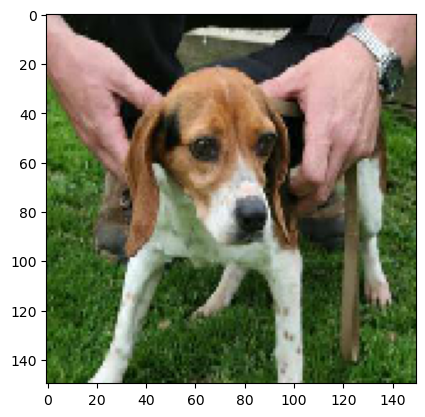

In [8]:
for data_batch, labels_batch in train_generator:
    print("data_batch:", data_batch.shape)
    print("labels_batch:", labels_batch.shape)
    print("labels:", labels_batch)
    print(data_batch[0])
    plt.imshow(data_batch[0])
    plt.show()
    break

In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=2*NSAMPLES//100, # number of times it executes until it declares epoch is over.
    epochs=30,
    validation_data=valid_generator,
    validation_steps=NSAMPLES//100)

Epoch 1/30
20/20 [==============================] - 16s 592ms/step - loss: 0.6936 - acc: 0.5280 - val_loss: 0.6743 - val_acc: 0.5750
Epoch 2/30
20/20 [==============================] - 4s 193ms/step - loss: 0.6634 - acc: 0.5940 - val_loss: 0.6455 - val_acc: 0.6100
Epoch 3/30
20/20 [==============================] - 4s 190ms/step - loss: 0.6397 - acc: 0.6230 - val_loss: 0.6507 - val_acc: 0.6090
Epoch 4/30
20/20 [==============================] - 4s 191ms/step - loss: 0.6081 - acc: 0.6680 - val_loss: 0.6222 - val_acc: 0.6500
Epoch 5/30
20/20 [==============================] - 4s 190ms/step - loss: 0.5801 - acc: 0.7005 - val_loss: 0.6289 - val_acc: 0.6560
Epoch 6/30
20/20 [==============================] - 4s 191ms/step - loss: 0.5347 - acc: 0.7380 - val_loss: 0.7090 - val_acc: 0.6480
Epoch 7/30
20/20 [==============================] - 4s 195ms/step - loss: 0.5262 - acc: 0.7300 - val_loss: 0.6182 - val_acc: 0.6750
Epoch 8/30
20/20 [==============================] - 4s 190ms/step - loss: 0

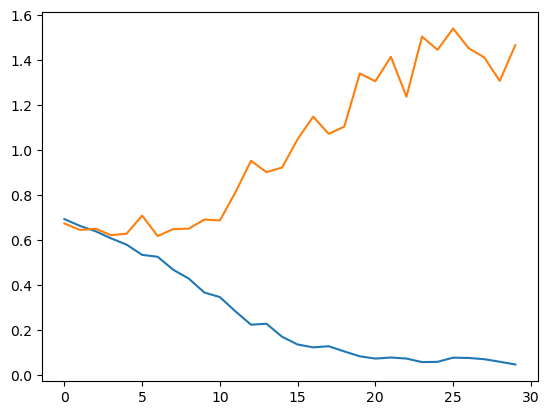

In [10]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

Not very good for the effort we did. We can try to use data augmentation by rotating, shifting, fliping, and shearing the image.

In [11]:
datagen = ImageDataGenerator(
    rotation_range=40, # between 0 and 180 degrees
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest")

dogs-vs-cats-small/dogs-vs-cats-small/train\dog.4567.jpg


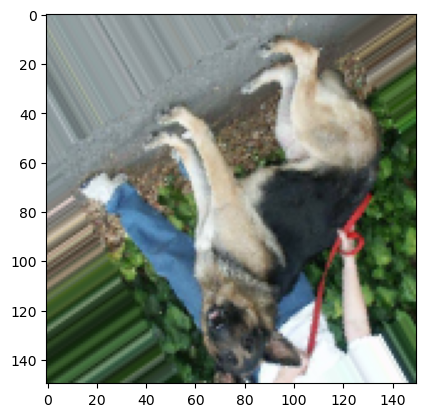

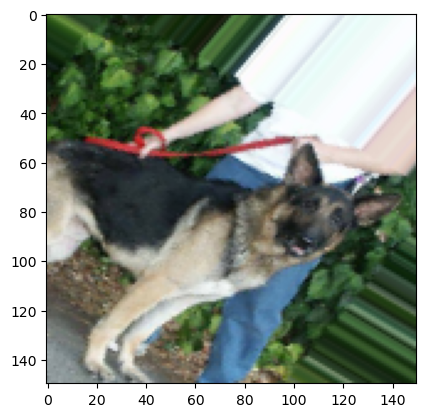

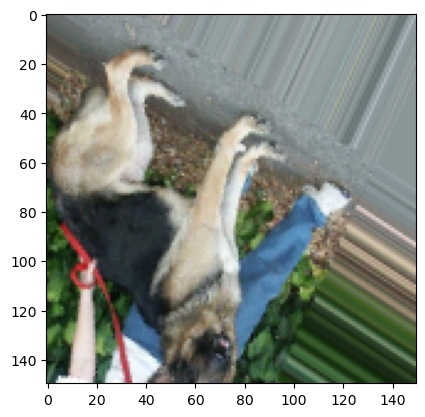

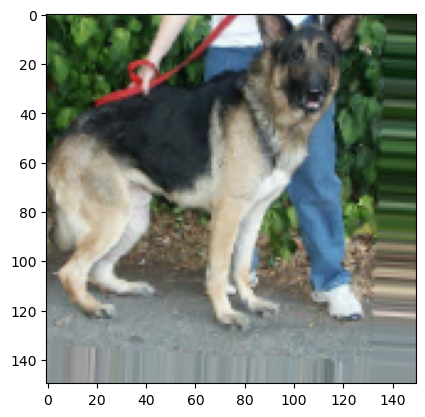

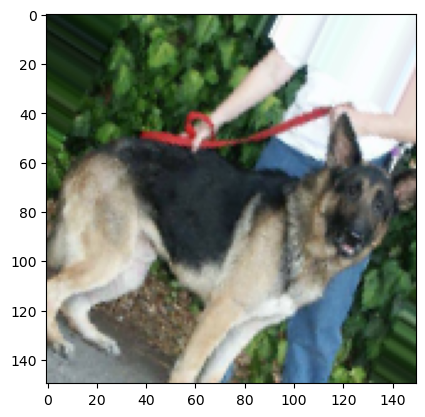

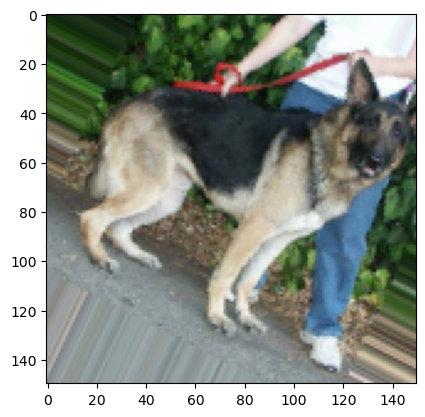

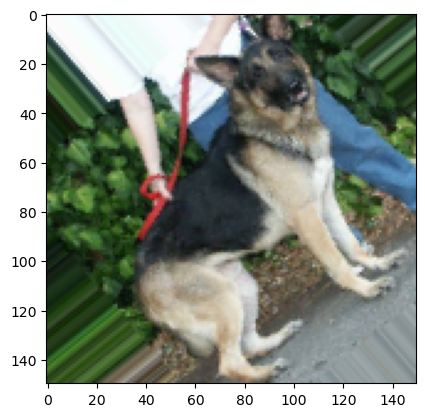

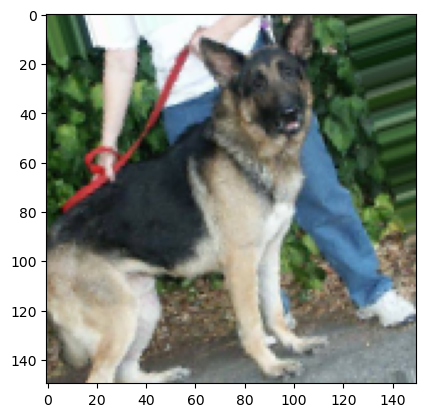

In [12]:
# let's see some of images

from tensorflow.keras.preprocessing import image

fname = train_dogs[0]

img = image.load_img(fname, target_size=(150, 150))

plt.imshow(img)
print(fname)

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 8 == 0:
        break
plt.show()

Let's see now if we can get better result.

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./256,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./256)
test_datagen = ImageDataGenerator(rescale=1./256)

train_generator = train_datagen.flow_from_directory(
    sampled_train_dir,
    target_size=(150,150),
    batch_size=100,
    class_mode="binary")

valid_generator = valid_datagen.flow_from_directory(
    sampled_valid_dir,
    target_size=(150,150),
    batch_size=100,
    class_mode="binary")

adam = tf.optimizers.Adam(lr=0.001)

model = get_model()
model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["acc"])

history = model.fit(
    train_generator,
    steps_per_epoch=2*NSAMPLES//100, # number of times it executes until it declares epoch is over.
    epochs=30,
    validation_data=valid_generator,
    validation_steps=NSAMPLES//100)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "mymodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 150, 150, 3)]     0         
_________________________________________________________________
fe0 (Conv2D)                 (None, 146, 146, 32)      2432      
_________________________________________________________________
r0 (Activation)              (None, 146, 146, 32)      0         
_________________________________________________________________
mp0 (MaxPooling2D)           (None, 73, 73, 32)        0         
_________________________________________________________________
fe1 (Conv2D)                 (None, 71, 71, 64)        18496     
_________________________________________________________________
r1 (Activation)              (None, 71, 71, 64)        0         
_________________________________________

C:\Users\Owner\anaconda3\envs\tf-gpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/30
20/20 [==============================] - 9s 415ms/step - loss: 0.6942 - acc: 0.5295 - val_loss: 0.6782 - val_acc: 0.5610
Epoch 2/30
20/20 [==============================] - 8s 402ms/step - loss: 0.6827 - acc: 0.5645 - val_loss: 0.6765 - val_acc: 0.5730
Epoch 3/30
20/20 [==============================] - 8s 407ms/step - loss: 0.6753 - acc: 0.5930 - val_loss: 0.6521 - val_acc: 0.6020
Epoch 4/30
20/20 [==============================] - 8s 402ms/step - loss: 0.6863 - acc: 0.5780 - val_loss: 0.6596 - val_acc: 0.5860
Epoch 5/30
20/20 [==============================] - 8s 405ms/step - loss: 0.6871 - acc: 0.5515 - val_loss: 0.6688 - val_acc: 0.6130
Epoch 6/30
20/20 [==============================] - 8s 416ms/step - loss: 0.6708 - acc: 0.5890 - val_loss: 0.6364 - val_acc: 0.6290
Epoch 7/30
20/20 [==============================] - 9s 441ms/step - loss: 0.6519 - acc: 0.6200 - val_loss: 0.6192 - val_acc: 0.6290
Epoch 8/30
20/20 [==============================] - 8s 408ms/step - loss: 0.

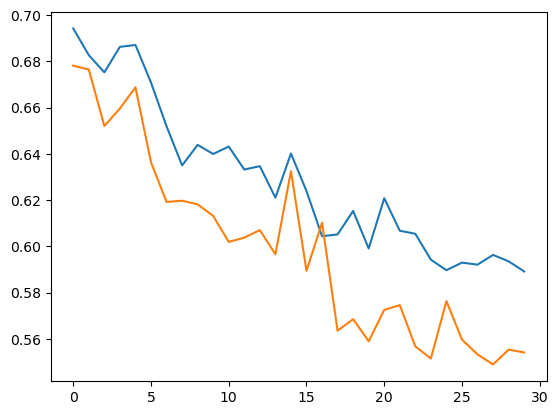

In [14]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

You should run both cases and change the number of epochs to 30 or so and report the validation and test accuracy. Try also to modify the network to get higher accuracy.

# Transfer Learning

In this part of the lab, you will load VGG16 and try to get it to improve the result of this model.

When you use pretrained networks, you have to pay attention to the preprocessing requirements of the inputs.

For example, `Resnet50` requires a minimum of `(200, 200, 3)` image.  Since our cats and dogs example has an image size of `(150, 150, 3)`, one possible solution is to use `UpSampling2D` layer to increase the image to `(300, 300, 3)`.

```python
x = UpSampling2D(size=(2, 2))(x_input)
```

You should definitely read any pre-trained documentation before starting using it. For VGG16, you can find it at https://keras.io/api/applications/vgg/.

All frameworks come with several pretrained models, like VGG, MobileNet, ResNet, and GoogleNet.

In [56]:
from tensorflow.keras.applications import VGG16

vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

In [57]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [58]:
# every layer or model with trainable set to false does not  
# update weights

vgg16.trainable = False

x_i = Input((150, 150, 3), name="input") # (4, 4, 512)
x = vgg16(x_i)
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)
x = Dropout(0.5, name="drop_input_512")(x)
x = Dense(512, name="d512", activation="relu")(x)
x = Dropout(0.5, name="drop_input_100")(x)
x = Dense(100, name="d100", activation="relu")(x)
x = Dense(1, name="d2", activation="sigmoid")(x)

model = Model(inputs=x_i, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 150, 150, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 512)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
drop_input_512 (Dropout)     (None, 2048)              0         
_________________________________________________________________
d512 (Dense)                 (None, 512)               1049088   
_________________________________________________________________
drop_input_100 (Dropout)     (None, 512)               0     

In [59]:
new_model = Model(vgg16.inputs, vgg16.get_layer("block4_conv3").output)
new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

Note that in this case, we are not retraining the VGG16 model, just the final dense layers. Why?

**Efficiency. It makes retraining the model much faster and less computationally expensive.**

dogs-vs-cats-small/dogs-vs-cats-small/train\dog.4567.jpg
(1, 150, 150, 3) (1, 4, 4, 512)


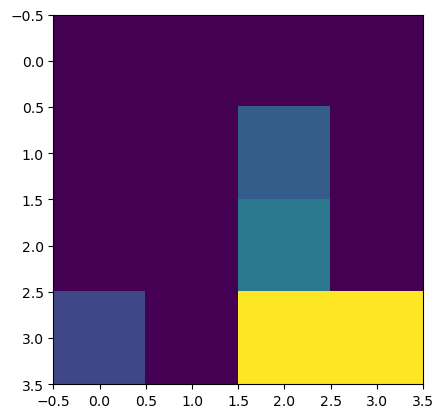

In [19]:
fname = train_dogs[0]
print(fname)
img = image.load_img(fname, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
output = vgg16(x)
print(x.shape, output.shape)
for i in range(3):
    #plt.imshow(x[0][...,i])
    plt.imshow(output[0][...,i])

In [60]:
optimizer = tf.keras.optimizers.SGD(0.001, momentum=0.9)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["acc"])

history = model.fit(
    train_generator,
    steps_per_epoch=2 * NSAMPLES//100, # number of times it executes until it declares epoch is over.
    epochs=30,
    validation_data=valid_generator,
    validation_steps=2 * NSAMPLES//(2*100))

Epoch 1/30
20/20 [==============================] - 9s 419ms/step - loss: 0.8606 - acc: 0.4855 - val_loss: 0.6728 - val_acc: 0.5540
Epoch 2/30
20/20 [==============================] - 8s 416ms/step - loss: 0.7572 - acc: 0.5320 - val_loss: 0.6275 - val_acc: 0.6600
Epoch 3/30
20/20 [==============================] - 8s 417ms/step - loss: 0.7140 - acc: 0.5610 - val_loss: 0.6150 - val_acc: 0.6080
Epoch 4/30
20/20 [==============================] - 9s 445ms/step - loss: 0.6831 - acc: 0.5760 - val_loss: 0.5900 - val_acc: 0.7790
Epoch 5/30
20/20 [==============================] - 9s 450ms/step - loss: 0.6742 - acc: 0.5915 - val_loss: 0.5782 - val_acc: 0.7770
Epoch 6/30
20/20 [==============================] - 9s 431ms/step - loss: 0.6644 - acc: 0.6105 - val_loss: 0.5630 - val_acc: 0.7990
Epoch 7/30
20/20 [==============================] - 8s 424ms/step - loss: 0.6504 - acc: 0.6145 - val_loss: 0.5425 - val_acc: 0.8070
Epoch 8/30
20/20 [==============================] - 8s 416ms/step - loss: 0.

Now, you should change the model above so that the vgg16 is only run before, and you should store the features extracted by vgg16 in memory in order to train the last layers of the network.

In [66]:
# save images and responses into respective directories so that you do not
# need to keep applying vgg during training loop

preprocessing_dir = dataset_dir + "/preproccess"
response_dir = dataset_dir + "/responses"

try: 
    shutil.rmtree(preprocessing_dir)
    shutil.rmtree(response_dir)
except:
    pass

os.mkdir(preprocessing_dir)
os.mkdir(response_dir)

os.mkdir(preprocessing_dir + "/dogs")
os.mkdir(preprocessing_dir + "/cats")

os.mkdir(response_dir + "/dogs")
os.mkdir(response_dir + "/cats")

#for fname in train_dogs[0:NSAMPLES]:
#    dst1 = preprocessing_dir + "/dogs" + os.path.split(src)[-1]
#    dst2 = response_dir + "/dogs" + os.path.split(src)[-1]
#    img = image.load_img(fname, target_size=(150, 150))
#    x = image.img_to_array(img)
#   x = x.reshape((1,) + x.shape)

#    output = vgg16(x)

#    shutil.copyfile(x, dst1)
#    shutil.copyfile(output, dst2)

for fname in train_dogs[0:NSAMPLES]:
    file_name = os.path.basename(fname)
    dst1 = os.path.join(preprocessing_dir, "dogs", file_name)
    dst2 = os.path.join(response_dir, "dogs", os.path.splitext(file_name)[0] + '.npy') 
    
    img = image.load_img(fname, target_size=(150, 150))
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    
    output = vgg16.predict(x)
    
    # Save the preprocessed image
    plt.imsave(dst1, x[0].astype('uint8')) 
    
    # Save the response as a numpy file
    np.save(dst2, output)

for fname in train_cats[0:NSAMPLES]:
    file_name = os.path.basename(fname)
    dst1 = os.path.join(preprocessing_dir, "cats", file_name)
    dst2 = os.path.join(response_dir, "cats", os.path.splitext(file_name)[0] + '.npy')  
    
    img = image.load_img(fname, target_size=(150, 150))
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    
    output = vgg16.predict(x)
    
    # Save the preprocessed image
    plt.imsave(dst1, x[0].astype('uint8')) 
    np.save(dst2, output)

In Keras, you can set "trainable" attribute for any layer or model. You should traverse vgg16, and try to set the trainable parameter to False before block5, and from block5 forward, it should be set to True.

In [67]:
vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

for l in vgg16.layers:
    if 'block5' not in l.name:
        l.trainable = False
    else:
        print(f'training layer {l.name}')

x_i = Input((150, 150, 3), name="input")
x = vgg16(x_i)
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)
x = Dropout(0.5, name="drop_input_512")(x)
x = Dense(512, name="d512", activation="relu")(x)
x = Dropout(0.5, name="drop_input_100")(x)
x = Dense(100, name="d100", activation="relu")(x)
x = Dense(1, name="d2", activation="sigmoid")(x)

model = Model(inputs=x_i, outputs=x)
model.summary()

training layer block5_conv1
training layer block5_conv2
training layer block5_conv3
training layer block5_pool
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 150, 150, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 512)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
drop_input_512 (Dropout)     (None, 2048)              0         
_________________________________________________________________
d512 (Dense)                 (None, 512)               1049088   
________________

In [68]:
# train your model
optimizer = tf.keras.optimizers.SGD(0.001, momentum=0.9)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["acc"])

history = model.fit(
    train_generator,
    steps_per_epoch=2 * NSAMPLES//100, # number of times it executes until it declares epoch is over.
    epochs=30,
    validation_data=valid_generator,
    validation_steps=2 * NSAMPLES//(2*100))

Epoch 1/30
20/20 [==============================] - 9s 423ms/step - loss: 0.7969 - acc: 0.5300 - val_loss: 0.6700 - val_acc: 0.5400
Epoch 2/30
20/20 [==============================] - 9s 445ms/step - loss: 0.7075 - acc: 0.5590 - val_loss: 0.6097 - val_acc: 0.7130
Epoch 3/30
20/20 [==============================] - 9s 457ms/step - loss: 0.6440 - acc: 0.6190 - val_loss: 0.5348 - val_acc: 0.7490
Epoch 4/30
20/20 [==============================] - 9s 439ms/step - loss: 0.5812 - acc: 0.6985 - val_loss: 0.4439 - val_acc: 0.7960
Epoch 5/30
20/20 [==============================] - 9s 463ms/step - loss: 0.5259 - acc: 0.7295 - val_loss: 0.3610 - val_acc: 0.8450
Epoch 6/30
20/20 [==============================] - 9s 447ms/step - loss: 0.4693 - acc: 0.7840 - val_loss: 0.3136 - val_acc: 0.8640
Epoch 7/30
20/20 [==============================] - 9s 442ms/step - loss: 0.4119 - acc: 0.8125 - val_loss: 0.2769 - val_acc: 0.8820
Epoch 8/30
20/20 [==============================] - 9s 438ms/step - loss: 0.

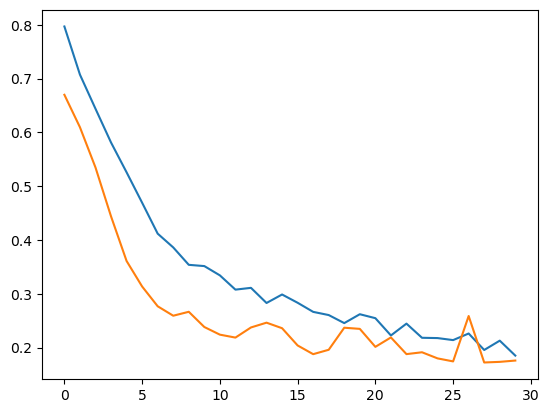

In [70]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

You should also try to use resnet50 and mobilenetv2.  You will need to use the appropriate `preprocess_function` function for each of the networks.

Remember also that for resnet50, you need to use an image of `(300, 300, 3)` and to use `UpSampling2D` before invoking resnet50 block.

The documentations can be found at https://keras.io/api/applications/

Report the best results you obtained, and plot the loss and accuracy of your experiments.

In [24]:
# resnet code
from tensorflow.keras.applications import ResNet50

input_tensor = Input(shape=(150, 150, 3))

upsample = UpSampling2D(size=(2,2))(input_tensor)

resnet50 = ResNet50(weights='imagenet', include_top=False, input_tensor=upsample)

In [25]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
up_sampling2d (UpSampling2D)    (None, 300, 300, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 306, 306, 3)  0           up_sampling2d[0][0]              
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
___________________________________________________________________________________________

In [26]:
# every layer or model with trainable set to false does not  
# update weights

resnet50.trainable = False

#x_i = Input((300, 300, 3), name="input") # (4, 4, 512)
x_i = Input((150, 150, 3), name="input")
x = resnet50(x_i)
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)
x = Dropout(0.5, name="drop_input_512")(x)
x = Dense(512, name="d512", activation="relu")(x)
x = Dropout(0.5, name="drop_input_100")(x)
x = Dense(100, name="d100", activation="relu")(x)
x = Dense(1, name="d2", activation="sigmoid")(x)

model = Model(inputs=x_i, outputs=x)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 150, 150, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 10, 10, 2048)      23587712  
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 2048)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 51200)             0         
_________________________________________________________________
drop_input_512 (Dropout)     (None, 51200)             0         
_________________________________________________________________
d512 (Dense)                 (None, 512)               26214912  
_________________________________________________________________
drop_input_100 (Dropout)     (None, 512)               0   

In [27]:
new_model = Model(resnet50.inputs, resnet50.get_layer("conv4_block6_out").output)
new_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
up_sampling2d (UpSampling2D)    (None, 300, 300, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 306, 306, 3)  0           up_sampling2d[0][0]              
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
____________________________________________________________________________________________

In [28]:
adam = tf.optimizers.Adam(lr=0.001)

model = get_model()
model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["acc"])

history = model.fit(
    train_generator,
    steps_per_epoch=2 * NSAMPLES//100, # number of times it executes until it declares epoch is over.
    epochs=30,
    validation_data=valid_generator,
    validation_steps=2 * NSAMPLES//(2*100))

Model: "mymodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 150, 150, 3)]     0         
_________________________________________________________________
fe0 (Conv2D)                 (None, 146, 146, 32)      2432      
_________________________________________________________________
r0 (Activation)              (None, 146, 146, 32)      0         
_________________________________________________________________
mp0 (MaxPooling2D)           (None, 73, 73, 32)        0         
_________________________________________________________________
fe1 (Conv2D)                 (None, 71, 71, 64)        18496     
_________________________________________________________________
r1 (Activation)              (None, 71, 71, 64)        0         
_________________________________________________________________
mp1 (MaxPooling2D)           (None, 35, 35, 64)        0   

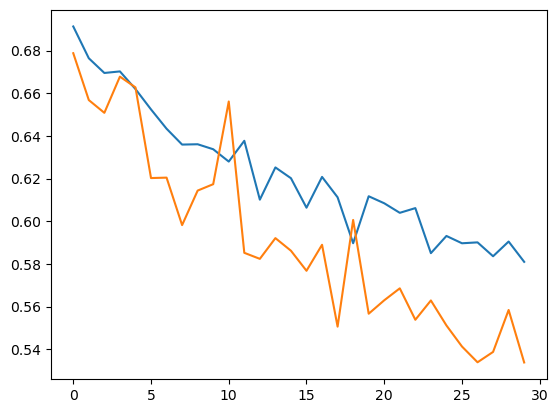

In [29]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

# Hyperparameter Tuning Using KerasTuner (AutoML)

In this lab, you will perform hyperparameter tuning using KerasTuner.

You will fine tune a model to try to outperform other models.

To install keras tuner, you need to do.

```shell
pip3 install keras-tuner
```

In [30]:
!pip3 install keras-tuner

In [31]:
!pip3 install protobuf==3.20.0

In [32]:
# you may need to uninstall and reinstall protobuffer to get the latest version of keras tuner.

!pip3 uninstall protobuf python3-protobuf -y
!pip3 install --upgrade protobuf
!pip3 install keras-tuner --upgrade

Found existing installation: protobuf 3.20.0
Uninstalling protobuf-3.20.0:
  Successfully uninstalled protobuf-3.20.0


You can safely remove it manually.


  Using cached protobuf-4.25.3-cp39-cp39-win_amd64.whl.metadata (541 bytes)
Using cached protobuf-4.25.3-cp39-cp39-win_amd64.whl (413 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires clang~=5.0, which is not installed.
tensorboard 2.6.0 requires google-auth<2,>=1.6.3, but you have google-auth 2.6.0 which is incompatible.
tensorflow 2.6.0 requires absl-py~=0.10, but you have absl-py 1.4.0 which is incompatible.
tensorflow 2.6.0 requires flatbuffers~=1.12, but you have flatbuffers 20210226132247 which is incompatible.


In [33]:
from tensorflow import keras
import keras_tuner as kt

(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values between 0 and 1
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0

In [34]:
import tensorflow as tf 

def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
    
  # 8 x 6 x 3 x 3 ~ 500 options

  for i in range(hp.Int('layers', 3, 10)):
        model.add(tf.keras.layers.Dense(
            units=hp.Int('units_' + str(i), 50, 100, step=10),
            activation=hp.Choice('act_' + str(i), ['relu', 'swish', 'gelu'])))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer 
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 

  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
                metrics = ['accuracy'])

  return model

In [35]:
mode = 'random'
keras_tuner_dir = 'kt_dir'

try:
    shutil.rmtree(keras_tuner_dir)
except:
    pass

if mode == 'hyperband':
    tuner = kt.Hyperband(
        model_builder,
        objective = 'val_accuracy', 
        max_epochs = 10,
        factor = 3,
        directory = keras_tuner_dir,
        project_name = 'intro_to_kt_hyperband')
else:
    tuner = kt.RandomSearch(
        model_builder,
        objective='val_accuracy',
        max_trials=30,
        executions_per_trial=1,
        directory=keras_tuner_dir,
        project_name='intro_kt_random')

In [36]:
tuner.search(
    img_train, label_train, 
    batch_size=64,
    epochs = 5, 
    validation_data = (img_test, label_test), 
    callbacks = [])

Trial 30 Complete [00h 00m 14s]
val_accuracy: 0.840399980545044

Best val_accuracy So Far: 0.8759999871253967
Total elapsed time: 00h 05m 36s


In [37]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

n_layers = best_hps.get('layers')
print(n_layers)
print()
for i in range(n_layers):
    print(best_hps.get('units_' + str(i)), best_hps.get('act_' + str(i)))
print(best_hps.get('learning_rate'))

7

100 gelu
70 relu
60 gelu
100 gelu
90 swish
70 gelu
90 relu
0.001


Keras tuner has three optimizers.

- RandomSearch
- BayesianOptimization (Gaussian Processes)
- Hyperband

In the code, we showed how to start random search and hyperband. 

Usually, you use the following parameters in Keras Tuner.

- hp.Boolean
- hp.Int
- hp.Float
- hp.Choice
- hp.Fixed
- hp.Float
- Conditional scope

You can find more information in https://keras.io/keras_tuner/

Now you can tune your VGG network from Section 1 to see which model will get the best performance.

In [61]:
def vgg_model_builder(hp):
  
  model = keras.Sequential()
  model.add(vgg16)
  model.add(keras.layers.Flatten())

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
    
  # 8 x 6 x 3 x 3 ~ 500 options

  for i in range(hp.Int('layers', 1, 10)):
        model.add(tf.keras.layers.Dense(
            units=hp.Int('units_' + str(i), 50, 100, step=10),
            activation=hp.Choice('act_' + str(i), ['relu', 'swish', 'gelu'])))
  model.add(keras.layers.Dense(1, activation='sigmoid'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 

  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss='binary_crossentropy',
                #loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
                metrics = ['accuracy'])

  return model

In [62]:
mode = 'random'
keras_tuner_dir = 'kt_dir_vgg'

try:
    shutil.rmtree(keras_tuner_dir)
except:
    pass

if mode == 'hyperband':
    tuner = kt.Hyperband(
        vgg_model_builder,
        objective = 'val_accuracy', 
        max_epochs = 10,
        factor = 3,
        directory = keras_tuner_dir,
        project_name = 'intro_to_kt_hyperband_vgg')
else:
    tuner = kt.RandomSearch(
        vgg_model_builder,
        objective='val_accuracy',
        max_trials=30,
        executions_per_trial=1,
        directory=keras_tuner_dir,
        project_name='intro_kt_random_vgg')

In [63]:
tuner.search(
    train_generator, 
    batch_size=64,
    epochs = 5, 
    validation_data = valid_generator, 
    validation_steps=2 * NSAMPLES//(2*100),
    callbacks = [],
)

Trial 30 Complete [00h 00m 44s]
val_accuracy: 0.8790000081062317

Best val_accuracy So Far: 0.8989999890327454
Total elapsed time: 00h 22m 19s


In [64]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

n_layers = best_hps.get('layers')
print(n_layers)
print()
for i in range(n_layers):
    print(best_hps.get('units_' + str(i)), best_hps.get('act_' + str(i)))
print(best_hps.get('learning_rate'))

8

50 gelu
70 relu
70 gelu
80 gelu
60 swish
100 swish
50 swish
90 gelu
0.001
